# 03. Data Visualitation: Cars Final 

Along this notebook we will perform an exploratory analysis of the dataset, having a look to all the variables and checking for outliners.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

In [2]:
cars = ("/users/alfon/Desktop/Master/TFM/CSV/02.cars_cleaned_def.csv")

In [3]:
df = pd.read_csv(cars)
df.sample(5)

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
27054,SEAT,Leon,León 1.6 Last Edition 105,sedan,2006,190000,105,Manual,Petrol,7.0,5,Blue,33012,Asturias,Private,3600
13512,Renault,Clio,ST 1.5dCi Ecoleader En. Dynamique 90,familiar,2016,113625,90,Manual,Diesel,3.3,5,Red,50013,Zaragoza,Dealer,9579
4082,HUMMER,H2,6.0 V8 Classic,suv,2005,81000,315,Automatic,Petrol,20.6,5,Gold,8394,Barcelona,Private,41500
8413,MINI,One Cabrio,Mini one cabrio,cabrio,2012,83150,98,Manual,Petrol,5.7,3,Beige,29600,Málaga,Private,10495
25435,Renault,Espace,2.0dCi Elegance,minivan,2007,198000,110,Manual,Diesel,7.2,5,Black,43006,Tarragona,Private,6000


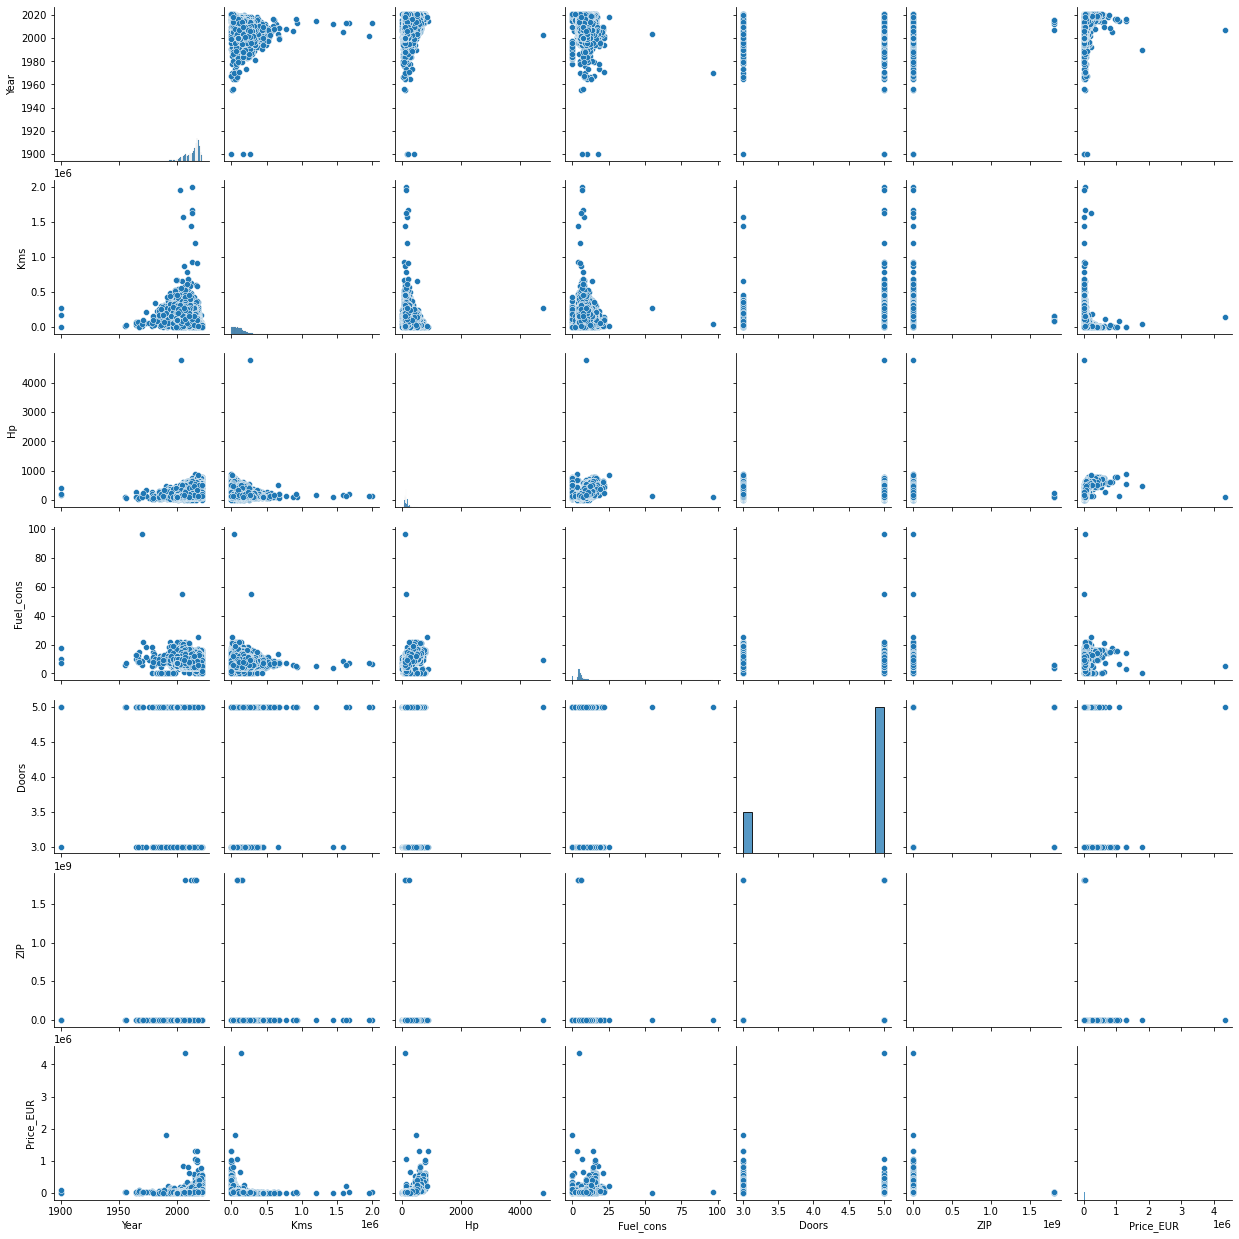

In [4]:
sns.pairplot(df)


Text(0.5, 1.0, 'Cars per Brand')

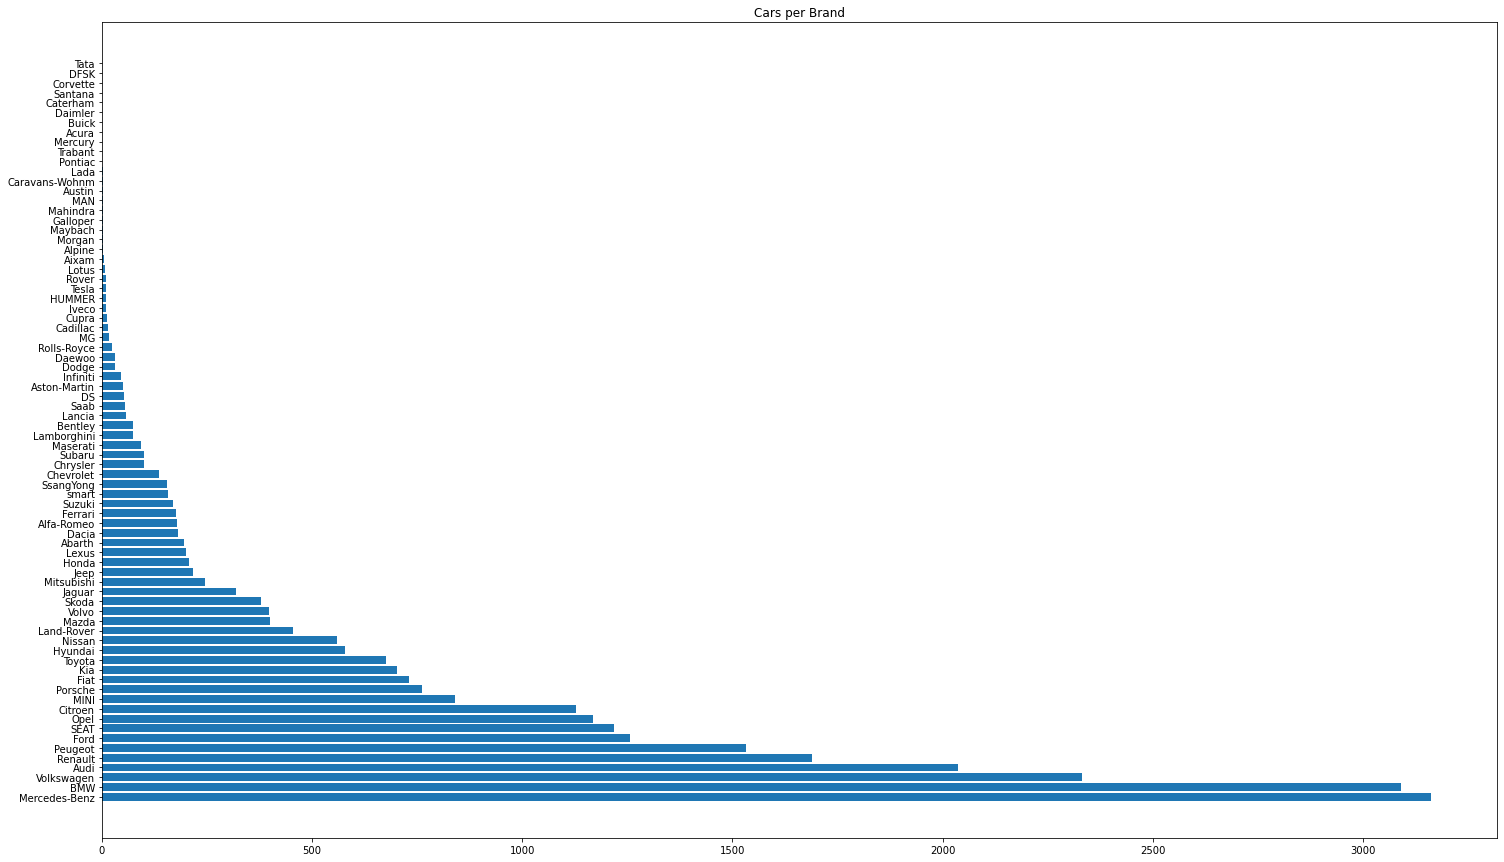

In [5]:
fig, ax = plt.subplots (figsize=(25,15))
plt.barh(df.Brand.value_counts().index, df.Brand.value_counts().values);
plt.title("Cars per Brand")

## Analysing the Prices

In [6]:
df_mean_price = df.groupby("Brand")["Price_EUR"].mean().reset_index()

df_mean_price.head()

,Brand,Price_EUR
0,Abarth,18110.132653
1,Acura,21000.000000
2,Aixam,6049.750000
3,Alfa-Romeo,14478.608939
4,Alpine,66633.333333


<AxesSubplot:title={'center':'Mean_Price per Brand'}, xlabel='Brand'>

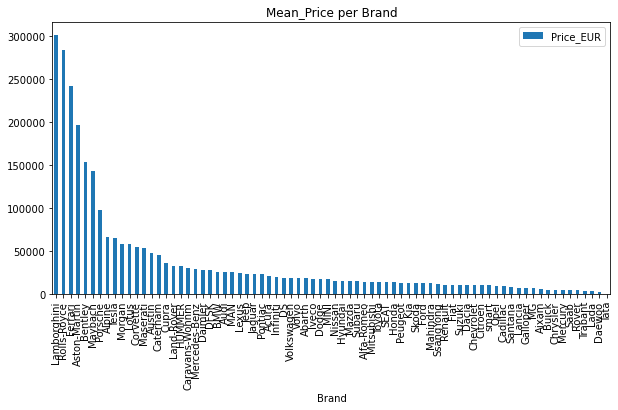

In [7]:
df_mean_price = df_mean_price.sort_values("Price_EUR", ascending = False)

df_mean_price.plot(x = "Brand", y = "Price_EUR", kind = "bar", figsize = (10,5), title = "Mean_Price per Brand")


## Analysing the Year

<AxesSubplot:ylabel='Frequency'>

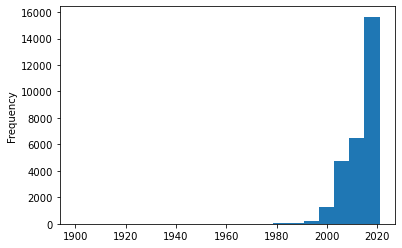

In [8]:
df['Year'].plot(kind='hist', bins=20)

As we can see on the graph above most of the cars on the data frame are from 2010 in advance

## Analysing the Fuel type

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Diesel'),
  Text(1, 0, 'Petrol'),
  Text(2, 0, 'Hybrid'),
  Text(3, 0, 'Electric'),
  Text(4, 0, 'CNG'),
  Text(5, 0, 'LPG')])

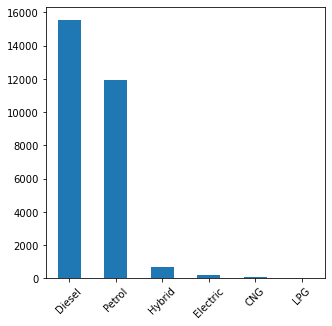

In [9]:
df_Fuel_type = df['Fuel_type'].value_counts()
df_Fuel_type.plot(kind = "bar", figsize = (5,5))
plt.xticks(rotation=45)


Hybrids and Electric cars are still not very popular in the market.

## Analysing the Gear type

<AxesSubplot:ylabel='Gear_type'>

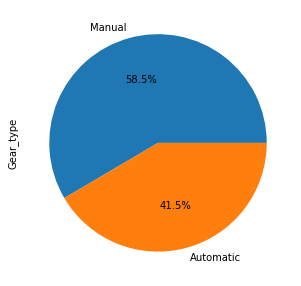

In [10]:
df_Gear_type = df['Gear_type'].value_counts()
df_Gear_type.plot.pie(y='Gear',figsize=(5, 5),autopct='%1.1f%%', startangle=0)

The conclusion obtained from aboves pie is that the Manual cars on this dataset are a little bit more common than Automatic ones

## Analysing the Province

In [11]:
import geopandas as gpd

In [12]:
df_province = df[["Province", "ZIP"]]

df_province['ZIP'] = df_province['ZIP'].apply(str).apply(lambda x: x.zfill(5))

df_province['ZIP'] = df_province['ZIP'].str.slice(stop = 2)

df_province.sample(5)

/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_27346/1957262456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province['ZIP'] = df_province['ZIP'].apply(str).apply(lambda x: x.zfill(5))
/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_27346/1957262456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_province['ZIP'] = df_province['ZIP'].str.slice(stop = 2)


,Province,ZIP
24996,Badajoz,06
23930,Madrid,28
2776,Barcelona,08
25785,Cádiz,11
17140,Valencia,46


In [13]:
df_province_grouped = df_province["ZIP"].value_counts().reset_index()
df_province_grouped.head()

,index,ZIP
0,28,6824
1,08,4086
2,46,1810
3,41,1636
4,29,1582


In [14]:
# Filepaths
ub_shp = "/users/alfon/Desktop/Master/TFM/Files/gadm36_ESP_shp/gadm36_ESP_2.shp"

# Opening the files
spain_shapefile = gpd.read_file(ub_shp, encoding='utf-8')
spain_shapefile.sample(2)

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
24,ESP,Spain,ESP.5_1,Castilla y León,None,ESP.5.8_1,Valladolid,None,None,Provincia,Province,47,ES.CL.VD,"MULTIPOLYGON (((-5.30633 42.27157, -5.30165 42..."
51,ESP,Spain,ESP.18_1,Región de Murcia,None,ESP.18.1_1,Murcia,None,None,Provincia,Province,30,ES.MU.MR,"MULTIPOLYGON (((-1.54680 37.40990, -1.54681 37..."


In [15]:
spain_shapefile = spain_shapefile.merge(df_province_grouped, left_on=['CC_2'],right_on=['index'], how='left')

In [16]:
plt.rcParams["figure.figsize"]=20,20


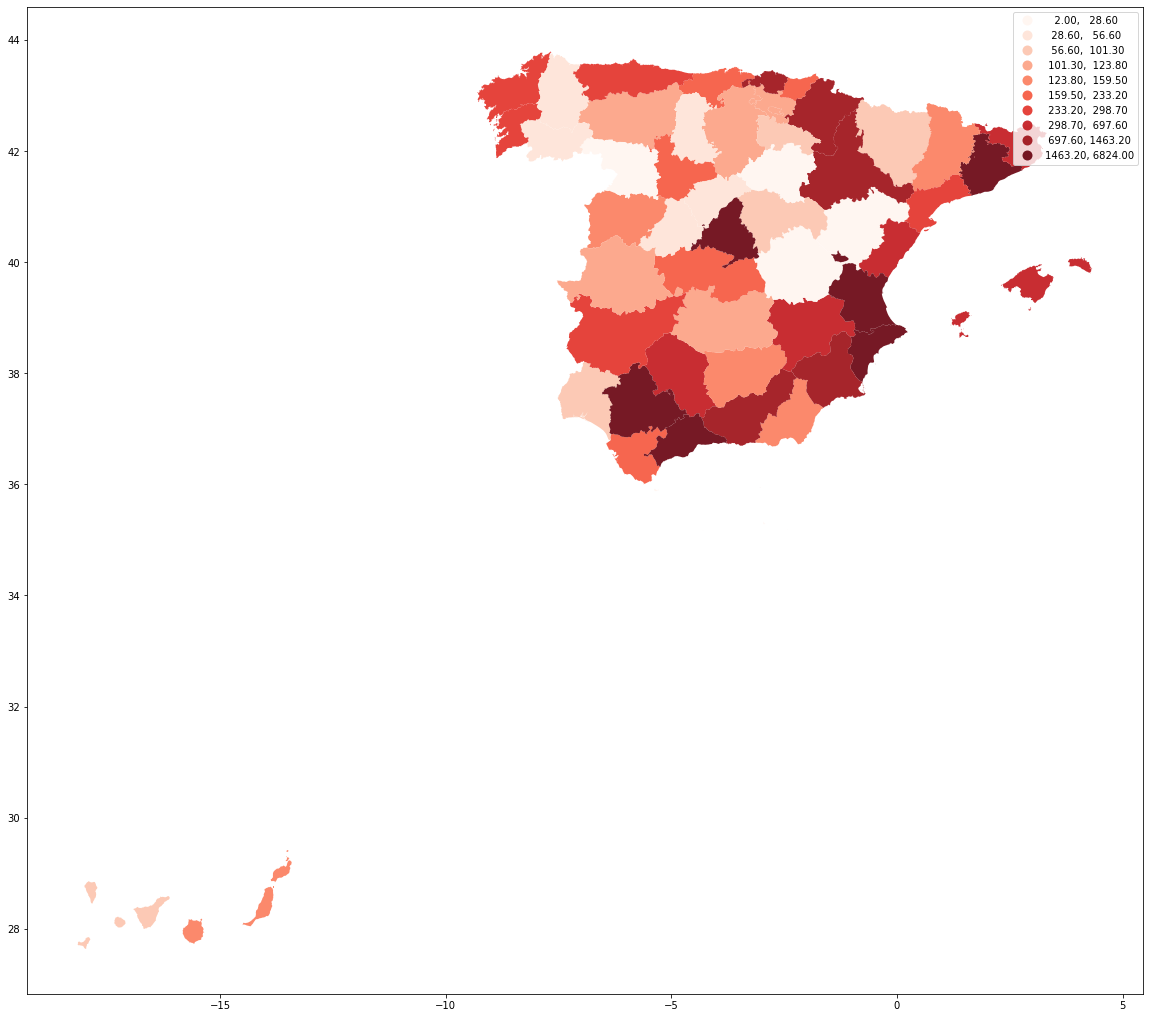

In [17]:
spain_map = spain_shapefile.plot(column="ZIP", scheme = "quantiles" ,linewidth=0.9, cmap="Reds", k=10, alpha=0.9, legend=True) 

## Analysing the Colours

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Black'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Grey'),
  Text(3, 0, 'Blue'),
  Text(4, 0, 'Silver'),
  Text(5, 0, 'Red'),
  Text(6, 0, 'Green'),
  Text(7, 0, 'Brown'),
  Text(8, 0, 'Beige'),
  Text(9, 0, 'Yellow'),
  Text(10, 0, 'Orange'),
  Text(11, 0, 'Burgundy'),
  Text(12, 0, 'Bronze'),
  Text(13, 0, 'Gold')])

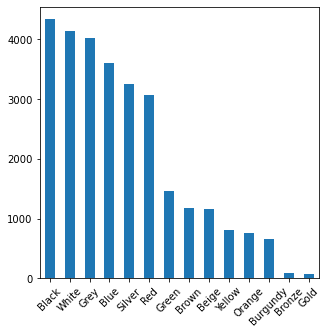

In [18]:
df_Fuel_type = df['Colour'].value_counts()
df_Fuel_type.plot(kind = "bar", figsize = (5,5))
plt.xticks(rotation=45)



## Analysing the Seller

(array([0, 1]), [Text(0, 0, 'Dealer'), Text(1, 0, 'Private')])

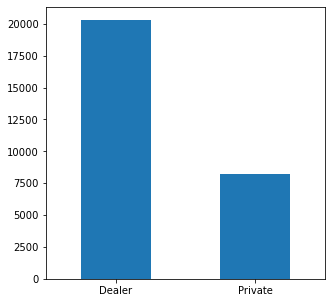

In [19]:
df_Fuel_type = df['Seller'].value_counts()
df_Fuel_type.plot(kind = "bar", figsize = (5,5))
plt.xticks(rotation=0)



## Checking Outliners

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,28536.0,2013.184434,6.201167e+00,1900.0,2010.0,2015.0,2018.00,2.021000e+03
Kms,28536.0,107132.962083,7.993876e+04,0.0,48103.0,95579.0,149080.25,1.999999e+06
Hp,28536.0,172.728869,1.074997e+02,1.0,116.0,140.0,190.00,4.759000e+03
Fuel_cons,28536.0,5.992799,2.626281e+00,0.0,4.5,5.3,6.90,9.700000e+01
Doors,28536.0,4.558943,8.292205e-01,3.0,5.0,5.0,5.00,5.000000e+00
ZIP,28536.0,533298.068755,3.030205e+07,1001.0,11130.0,28260.0,35118.00,1.810018e+09
Price_EUR,28536.0,23659.870655,5.079475e+04,220.0,9000.0,14990.0,22990.00,4.350545e+06


### a) Year:

<AxesSubplot:>

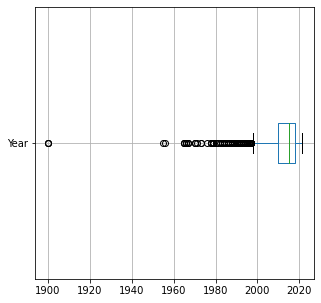

In [21]:
df.boxplot('Year', vert = False, figsize = (5,5))

In [22]:
df[df["Year"] < 1960 ]

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
3190,Land-Rover,Range Rover Sport,2.7TDV6 HSE Aut.,suv,1900,170000,190,Automatic,Diesel,10.2,5,Green,8023,Barcelona,Private,11950
5031,Mercedes-Benz,C Class,CDI Avantgarde,sedan,1900,272000,224,Automatic,Diesel,6.9,5,Beige,48800,Vizcaya,Private,6500
12961,Land-Rover,Series,LAND ROVER SERIES I,suv,1955,9000,102,Manual,Petrol,6.0,5,Green,41011,Sevilla,Private,43500
14774,Ferrari,360,Challenge Stralade 3.6,coupe,1900,2000,426,Automatic,Petrol,17.9,3,Red,31009,Navarra,Private,90000
17005,Peugeot,404,Peugeot 403,sedan,1956,28000,82,Manual,Petrol,7.0,5,Black,46925,Valencia,Private,14500


In [23]:
# HAVE TO REMOVE CARS FROM 1900

df = df.drop(df[df["Year"] == 1900 ].index)

In [24]:
df[df["Year"] < 2001 ].sample(5)

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
24696,Nissan,Terrano,2.7 TDi Comfort,suv,2000,304574,125,Manual,Diesel,9.8,5,Green,39479,Cantabria,Dealer,6500
2066,BMW,Z3,2.0i Roadster,coupe,2000,85294,150,Manual,Petrol,8.0,3,Silver,8960,Barcelona,Dealer,9500
1048,Lada,Niva,4X4,familiar,1993,85000,80,Manual,Petrol,0.0,5,Green,8560,Barcelona,Dealer,5500
27946,Volvo,S40,1.8i,sedan,1999,36000,125,Manual,Petrol,6.9,5,Green,1001,Álava,Private,1200
2812,Mercedes-Benz,SLK Class,KOMPRESSOR,cabrio,1997,82000,193,Manual,Petrol,8.1,3,Blue,8787,Barcelona,Private,8900


The cars above are all previous to 2001. We can come to the conclusion that there is no problem with outliners for the Year column

### Kms:

<AxesSubplot:>

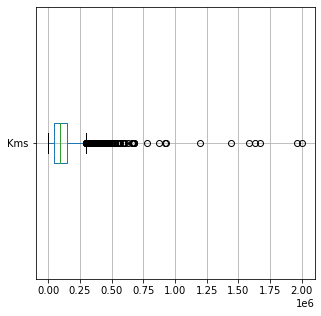

In [25]:
df.boxplot('Kms', vert = False, figsize = (5,5))

In [26]:
df_very_out_kms = df[df["Kms"] > 1000000 ]
df_very_out_kms

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
8490,Audi,Q7,3.0TDI Advanced Edition 204 Tiptronic,suv,2013,1670000,204,Automatic,Diesel,7.2,5,Brown,29130,Málaga,Private,23000
11087,MINI,Cooper S,Mini Aut.,sedan,2015,1200003,192,Automatic,Petrol,5.4,5,Blue,3201,Alicante,Private,10999
21625,Land-Rover,Range Rover Evoque,2.2L TD4 Pure 4x4 Aut.,suv,2013,1999999,150,Automatic,Diesel,6.5,5,Burgundy,28232,Madrid,Dealer,17990
23019,MINI,Cooper S Cabrio,Mini,cabrio,2005,1580000,170,Manual,Petrol,8.3,3,Grey,28470,Madrid,Private,12000
23230,Alfa-Romeo,Giulietta,Distintive 1.6 JTD M-2,coupe,2012,1440001,105,Manual,Diesel,4.0,3,Red,28292,Madrid,Private,8600
25345,Volkswagen,Passat Variant,2.5TDI Highline 4Motion,familiar,2002,1960000,150,Manual,Diesel,6.9,5,Blue,43205,Tarragona,Private,1800
27544,Land-Rover,Range Rover Evoque,2.2L TD4 Dynamic 4x4 Aut.,suv,2013,1630000,150,Automatic,Diesel,6.0,5,Red,17740,Gerona/Girona,Private,230000


In [27]:
# HAVE TO REMOVE aboves

df = df.drop(df[df["Kms"] > 1000000 ].index)


In [28]:
df_out_kms = df[df["Kms"] > 500000 ]
df_out_kms

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
3615,Mercedes-Benz,ML Class,CDI Aut.,suv,2007,520000,224,Automatic,Diesel,9.4,5,Black,8206,Barcelona,Private,7500
5823,Skoda,Fabia,Combi 1.6TDI CR Family 90,familiar,2013,929705,90,Manual,Diesel,4.2,5,Silver,18360,Granada,Dealer,7900
6993,Volkswagen,Transporter,Chasis Cabina 1.9TDI 104,van,2005,560000,103,Manual,Diesel,8.2,5,White,30800,Murcia,Private,6500
7264,Volkswagen,Caddy,Maxi 1.6TDI ComfortlineDSG 7pl. 102,familiar,2012,632000,102,Automatic,Diesel,5.7,5,White,7620,Baleares,Private,9500
8541,Opel,Zafira,1.9 CDTI Elégance,minivan,2006,875200,120,Manual,Diesel,6.1,5,Grey,29620,Málaga,Private,1800
11463,Mercedes-Benz,Sprinter Class,Furgón 316CDI Largo T.E.,van,2011,590000,163,Manual,Diesel,8.2,5,White,3187,Alicante,Private,14900
14746,Land-Rover,Range Rover,3.6TdV8 Vogue Aut.,suv,2006,504000,272,Automatic,Diesel,11.3,5,Blue,31004,Navarra,Private,8450
14810,Audi,A6,3.0TDI quattro Tiptronic 233,sedan,2007,568000,232,Automatic,Diesel,8.3,5,White,31001,Navarra,Private,3800
16892,Volkswagen,T4 Caravelle,2.5TDi 102 2920 D.E.,familiar,2001,540000,102,Manual,Diesel,7.5,5,Grey,46170,Valencia,Private,4800
16920,Suzuki,Grand Vitara,1.9DDiS JX-A,suv,2008,780001,129,Manual,Diesel,7.4,5,Grey,46021,Valencia,Private,11900


<AxesSubplot:>

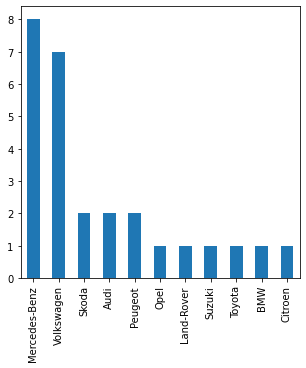

In [29]:
df_out_kms_by_brand = df_out_kms['Brand'].value_counts()
df_out_kms_by_brand.plot(kind = "bar", figsize = (5,5))


From .decribe T function above we can see that the largest milage is 2M Kms and cars with more than 1M Kms will be considered as outliners and will be deleted. Tte bar graph just above shows that the cars with highest kms but not consudered as outliner mileages are eather Premium makes or generalistic car makes dedicated to the transport industry so we can conclude there are no outliners for Kms

### Horse Power:

<AxesSubplot:>

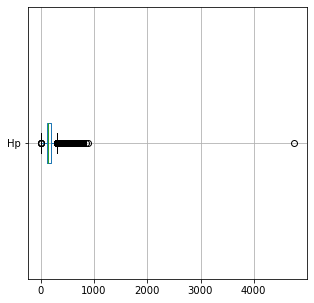

In [30]:
df.boxplot('Hp', vert = False, figsize = (5,5))

In [31]:
df[df["Hp"] > 1000 ]

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
25216,Mitsubishi,Montero,3.2 DI-D GLX,suv,2003,267252,4759,Manual,Diesel,9.3,5,Silver,13344,Ciudad Real,Private,7500


In [32]:
# HAVE TO REMOVE aboves

df = df.drop(df[df["Hp"] > 1000 ].index)



In [33]:
df[df["Hp"] > 300 ]

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
69,Maserati,GranTurismo,Sport MC Shift Aut.,coupe,2015,60000,460,Automatic,Petrol,15.5,3,Beige,8500,Barcelona,Dealer,77990
71,BMW,3 Series,335i Cabrio Aut.,cabrio,2007,73000,306,Automatic,Petrol,9.5,3,Beige,8120,Barcelona,Dealer,18500
72,BMW,3 Series,335i Cabrio Aut.,cabrio,2007,73000,306,Automatic,Petrol,9.5,3,Beige,8120,Barcelona,Dealer,18500
75,Lexus,RX 450h,Business,suv,2017,77000,313,Automatic,Hybrid,5.2,5,Beige,8203,Barcelona,Dealer,29990
89,Audi,Q7,3.0 TFSI Black line ed. quattro tiptronic,suv,2016,83900,333,Automatic,Petrol,8.1,5,Beige,8026,Barcelona,Dealer,45000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28467,Porsche,Cayenne,S Aut.,suv,2010,253000,400,Automatic,Petrol,10.5,5,Grey,40002,Segovia,Dealer,22900
28468,BMW,M3,Competition,sedan,2021,500,510,Automatic,Petrol,0.0,5,Green,40002,Segovia,Dealer,106900
28471,Audi,S7,Sportback 4.0TFSI quattro S-Tronic,coupe,2013,145000,420,Automatic,Petrol,8.2,3,Black,400002,Segovia,Dealer,42900
28527,Mercedes-Benz,C Class,Coupé Pack Performance Plus,coupe,2014,26900,487,Automatic,Petrol,12.0,3,Black,99700,NaN,Private,49900


Cars with more than 300 Hp are luxury cars. No reason to consider them as outliners

### Fuel consumption:

<AxesSubplot:>

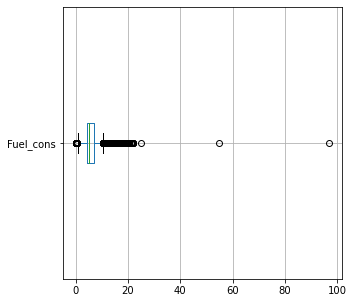

In [34]:
df.boxplot( "Fuel_cons", vert = False , figsize = (5,5))

In [35]:
df[df["Fuel_cons"] > 40]

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
24565,Alfa-Romeo,Giulia,Sedan,sedan,1970,39000,111,Manual,Petrol,97.0,5,White,35240,Las Palmas,Private,38000
26017,Audi,A4,avant familiar 5 puertas,familiar,2004,276000,131,Manual,Diesel,55.0,5,Black,23700,Jaén,Private,4500


In [36]:
# HAVE TO REMOVE aboves

df = df.drop(df[df["Fuel_cons"] > 40 ].index)

In [37]:
df[df["Fuel_cons"] == 0]

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
3,Renault,ZOE,Intens 40 R90 68kW,small,2017,34985,92,Automatic,Electric,0.0,5,Beige,8241,Barcelona,Dealer,10830
6,Fiat,500,1.0 Hybrid Dolcevita 52kW,small,2021,10,71,Manual,Petrol,0.0,5,Beige,8030,Barcelona,Dealer,15200
17,Fiat,500,500e 87Kw La Prima,small,2021,3000,118,Automatic,Electric,0.0,5,Beige,8030,Barcelona,Dealer,27900
43,Volkswagen,Passat,2.0 GL5,sedan,1988,193000,114,Manual,Petrol,0.0,5,Beige,8107,Barcelona,Dealer,1500
124,Opel,Corsa,1.2T XHL S/S Elegance 100,small,2021,10,101,Manual,Petrol,0.0,5,Blue,8226,Barcelona,Dealer,16900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28200,Hyundai,Kona,2.0 TGDI N Sky DCT,suv,2021,500,280,Automatic,Petrol,0.0,5,Blue,5004,Ávila,Dealer,34990
28204,Fiat,500,500e 87Kw La Prima,small,2020,5,118,Automatic,Electric,0.0,5,Green,5004,Ávila,Dealer,21990
28208,Hyundai,i30,2.0 TGDI N Performance 280,small,2021,5,280,Manual,Petrol,0.0,5,Red,5004,Ávila,Dealer,34500
28240,Peugeot,208,Allure Eléctrico 100kW,small,2020,10,136,Automatic,Electric,0.0,5,Yellow,24005,León,Dealer,23950


Some of the cars above could have a 0 l / 100 km consume as they are electric vehicles, others have that field missed and we are going to fill it with the the mean of the data set

In [38]:
df[(df["Fuel_cons"] == 0) & (df["Fuel_type"] != "Electric")] 

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
6,Fiat,500,1.0 Hybrid Dolcevita 52kW,small,2021,10,71,Manual,Petrol,0.0,5,Beige,8030,Barcelona,Dealer,15200
43,Volkswagen,Passat,2.0 GL5,sedan,1988,193000,114,Manual,Petrol,0.0,5,Beige,8107,Barcelona,Dealer,1500
124,Opel,Corsa,1.2T XHL S/S Elegance 100,small,2021,10,101,Manual,Petrol,0.0,5,Blue,8226,Barcelona,Dealer,16900
283,Renault,Espace,2.0 TXE,minivan,1990,197000,120,Manual,Petrol,0.0,5,Blue,8398,Barcelona,Dealer,5500
316,BMW,M4,Coupé Competition,coupe,2021,5000,510,Automatic,Petrol,0.0,3,Blue,8950,Barcelona,Dealer,103500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27906,BMW,X4,xDrive 20dA,coupe,2021,18,190,Automatic,Diesel,0.0,3,Red,1007,Álava,Dealer,71965
27992,Hyundai,i20,1.0 TGDI SLX 100,small,2021,10,101,Manual,Petrol,0.0,5,Burgundy,38639,Santa Cruz de Tenerife,Dealer,17900
28200,Hyundai,Kona,2.0 TGDI N Sky DCT,suv,2021,500,280,Automatic,Petrol,0.0,5,Blue,5004,Ávila,Dealer,34990
28208,Hyundai,i30,2.0 TGDI N Performance 280,small,2021,5,280,Manual,Petrol,0.0,5,Red,5004,Ávila,Dealer,34500


In [39]:
df.Fuel_cons[(df["Fuel_type"] != "Electric") & (df["Fuel_cons"] == 0)] = df["Fuel_cons"].replace(0 , np.NaN)\
                                 .fillna(df["Fuel_cons"].mean())




/var/folders/8d/r5dgt6bd65964tjj89vgvwh40000gn/T/ipykernel_27346/3477074120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Fuel_cons[(df["Fuel_type"] != "Electric") & (df["Fuel_cons"] == 0)] = df["Fuel_cons"].replace(0 , np.NaN)\


In [40]:
df[df["Fuel_cons"] > 10]

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
63,Chrysler,Voyager,2.4i SE,minivan,2004,146000,150,Manual,Petrol,10.1,5,Beige,8520,Barcelona,Dealer,2499
69,Maserati,GranTurismo,Sport MC Shift Aut.,coupe,2015,60000,460,Automatic,Petrol,15.5,3,Beige,8500,Barcelona,Dealer,77990
103,Toyota,Land Cruiser,200 4.5D-4D VXL Aut.,suv,2008,124000,286,Automatic,Diesel,10.2,5,Beige,8205,Barcelona,Dealer,42900
109,BMW,X5,3.0i Aut.,suv,2005,162000,231,Automatic,Petrol,12.9,5,Beige,8930,Barcelona,Dealer,10990
114,Land-Rover,Range Rover Sport,5.0 V8 SC AB Dynamic Aut.,suv,2014,65787,510,Automatic,Petrol,12.8,5,Beige,8227,Barcelona,Dealer,54500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28469,Mercedes-Benz,ML Class,Aut.,suv,2000,180000,218,Automatic,Petrol,11.9,5,Green,40300,Segovia,Dealer,5500
28501,Land-Rover,Defender,110 TDI SW,suv,1996,280000,111,Manual,Diesel,10.1,5,White,40180,Segovia,Private,13000
28517,Mitsubishi,Montero,3.2DI-D Kaiteki Aut.,suv,2008,54000,170,Automatic,Diesel,10.6,5,Blue,52005,Melilla,Private,17000
28527,Mercedes-Benz,C Class,Coupé Pack Performance Plus,coupe,2014,26900,487,Automatic,Petrol,12.0,3,Black,99700,NaN,Private,49900


Cars with a consume above 10 L / 100km are not outliners

### Price:

(0.0, 2000000.0)

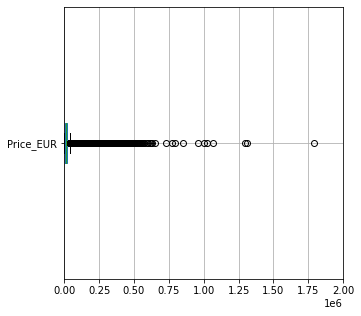

In [41]:
df.boxplot("Price_EUR", vert = False, figsize = (5,5))
plt.xlim(0,2000000)

<AxesSubplot:title={'center':'Price_EUR'}, xlabel='Brand'>

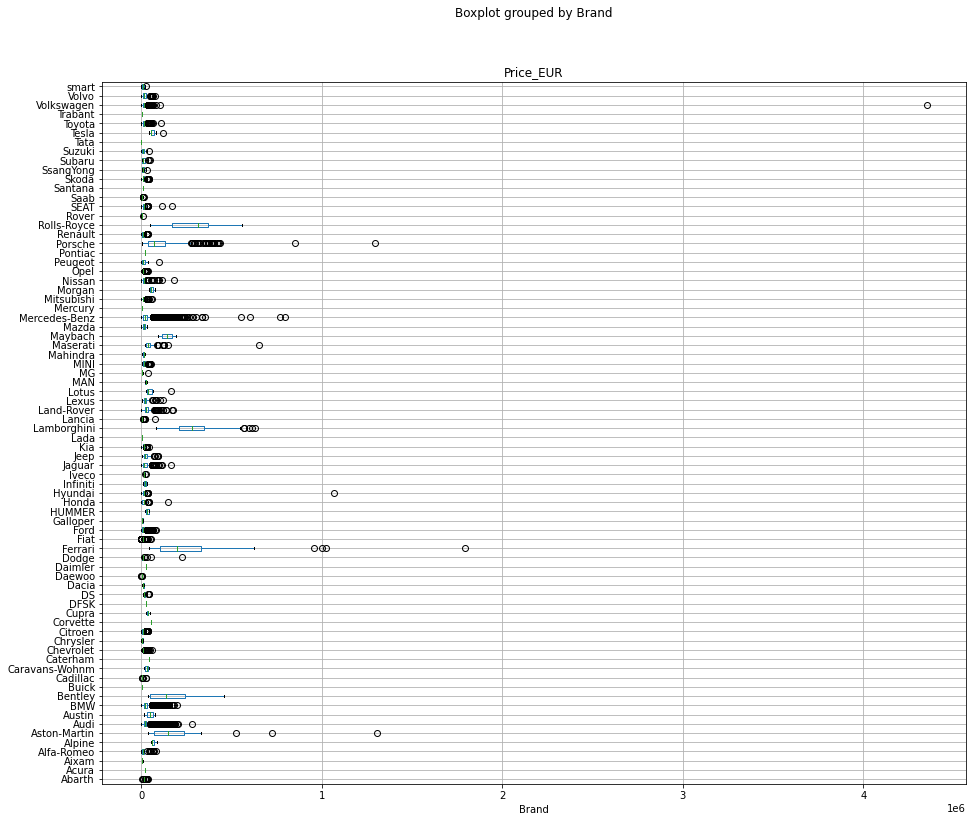

In [42]:
df.boxplot(column = "Price_EUR", by='Brand', vert = False, figsize = (15,13))

In [43]:
vw_outliner = df[(df["Price_EUR"] > 1000000) & (df["Brand"] == "Volkswagen")] 
vw_outliner

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
17014,Volkswagen,Polo,1.9TDI Edition,sedan,2007,140000,99,Manual,Diesel,4.9,5,Black,46600,Valencia,Private,4350545


In [44]:
# HAVE TO REMOVE aboves

df = df.drop(vw_outliner.index)

In [45]:
hyundai_outliner = df[(df["Price_EUR"] > 1000000) & (df["Brand"] == "Hyundai")] 
hyundai_outliner

,Brand,Model,Version,Type,Year,Kms,Hp,Gear_type,Fuel_type,Fuel_cons,Doors,Colour,ZIP,Province,Seller,Price_EUR
18502,Hyundai,Elantra,1.6i Tecno,small,2015,77758,132,Manual,Petrol,6.4,5,Grey,28022,Madrid,Dealer,1069012


In [46]:
# HAVE TO REMOVE aboves

df = df.drop(hyundai_outliner.index)

In [47]:
df.to_csv('/users/alfon/Desktop/Master/TFM/CSV/03.cars_final_def.csv', header=True, index=False)
